In [76]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
import os 
import matplotlib.pyplot as plt

In [61]:
# load data, get validation set, and scale inputs
split_idx = 10000
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_valid = x_train[split_idx:] / 255.0, x_train[:split_idx] / 255.0
y_train, y_valid = y_train[split_idx:], y_train[:split_idx]
x_test = x_test / 255.0

In [62]:
# define model
def mnist_model(n_hidden=2, learning_rate=1e-3, n_nodes=100, input_shape=[28,28], activation='relu'):
    model = keras.models.Sequential()
    model.add(Flatten(input_shape=input_shape))
    for n in range(n_hidden):
        model.add(Dense(n_nodes, activation=activation))
    model.add(Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
                  metrics=['accuracy'],
                  optimizer=optimizer)
    return model

# store logs for tf
root_logdir = os.path.join(os.curdir, 'mnist_logs')
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

def get_model_save_name():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S.h5')
    return run_id

In [69]:
# setup a grid/random search and find the best lr, # hidden, and # of nodes

param_distribs = {
    'n_hidden': [3,2,1],
    'n_nodes': [30,100,200],
    'learning_rate': 10**np.arange(-3.,1)
}
best_params = {'n_hidden': None,
    'n_nodes': None,
    'learning_rate': None,
    'loss': [float('inf'), 0.0],
    'logs': None,
    'model': None}
count = 0
for hidden in param_distribs['n_hidden']:
    for nodes in param_distribs['n_nodes']:
        for lr in param_distribs['learning_rate']:
            print('\n\n\n\n Model: {}/32'.format(count))
            count +=1
            run_logdir = get_run_logdir()
            run_model_save_file = get_model_save_name()
            callbacks = [EarlyStopping(patience=10,restore_best_weights=True),
                        TensorBoard(run_logdir),
                        ModelCheckpoint(run_model_save_file, save_best_only=True)]
            model = mnist_model(n_hidden=hidden, 
                                learning_rate=lr, 
                                n_nodes=nodes)
            model.fit(x_train, y_train, epochs=1000,
                      validation_data=(x_valid, y_valid),
                      callbacks=callbacks)
            loss = model.evaluate(x_valid, y_valid)
            if loss[0] < best_params['loss'][0]:
                best_params = {'n_hidden': hidden,
                                'n_nodes': nodes,
                                'learning_rate': lr,
                                'loss': loss,
                                'logs': run_logdir,
                                'model': run_model_save_file}
            print(best_params)





 Model: 0/32
Epoch 1/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2776 - accuracy: 0.1297 - val_loss: 2.1461 - val_accuracy: 0.2507
Epoch 2/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0849 - accuracy: 0.2943 - val_loss: 1.8153 - val_accuracy: 0.4466
Epoch 3/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7081 - accuracy: 0.4897 - val_loss: 1.2749 - val_accuracy: 0.6954
Epoch 4/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1681 - accuracy: 0.7134 - val_loss: 0.8613 - val_accuracy: 0.7837
Epoch 5/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.8201 - accuracy: 0.7817 - val_loss: 0.6648 - val_accuracy: 0.8211
Epoch 6/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.6490 - accuracy: 0.8178 - val_loss: 0.5592 - val_accuracy: 0.8453
Epoch 7/1000
1563/1563 [==============================] - 1s 868us/step - loss: 0.5541 - accuracy: 0.8414 -

1563/1563 [==============================] - 2s 1ms/step - loss: 0.1755 - accuracy: 0.9505 - val_loss: 0.1983 - val_accuracy: 0.9411
Epoch 57/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1770 - accuracy: 0.9502 - val_loss: 0.1985 - val_accuracy: 0.9413
Epoch 58/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1780 - accuracy: 0.9488 - val_loss: 0.1960 - val_accuracy: 0.9432
Epoch 59/1000
1563/1563 [==============================] - 2s 986us/step - loss: 0.1744 - accuracy: 0.9504 - val_loss: 0.1956 - val_accuracy: 0.9423
Epoch 60/1000
1563/1563 [==============================] - 1s 832us/step - loss: 0.1787 - accuracy: 0.9492 - val_loss: 0.1945 - val_accuracy: 0.9431
Epoch 61/1000
1563/1563 [==============================] - 1s 889us/step - loss: 0.1731 - accuracy: 0.9505 - val_loss: 0.1922 - val_accuracy: 0.9441
Epoch 62/1000
1563/1563 [==============================] - 1s 893us/step - loss: 0.1705 - accuracy: 0.9509 - val_loss: 0.1912 

1563/1563 [==============================] - 1s 872us/step - loss: 0.1201 - accuracy: 0.9660 - val_loss: 0.1571 - val_accuracy: 0.9540
Epoch 112/1000
1563/1563 [==============================] - 1s 911us/step - loss: 0.1166 - accuracy: 0.9666 - val_loss: 0.1585 - val_accuracy: 0.9535
Epoch 113/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1206 - accuracy: 0.9649 - val_loss: 0.1576 - val_accuracy: 0.9543
Epoch 114/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1199 - accuracy: 0.9655 - val_loss: 0.1579 - val_accuracy: 0.9539
Epoch 115/1000
1563/1563 [==============================] - 1s 842us/step - loss: 0.1178 - accuracy: 0.9665 - val_loss: 0.1574 - val_accuracy: 0.9547
Epoch 116/1000
1563/1563 [==============================] - 1s 876us/step - loss: 0.1156 - accuracy: 0.9668 - val_loss: 0.1593 - val_accuracy: 0.9546
Epoch 117/1000
1563/1563 [==============================] - 1s 951us/step - loss: 0.1151 - accuracy: 0.9674 - val_loss:

Epoch 166/1000
1563/1563 [==============================] - 1s 845us/step - loss: 0.0947 - accuracy: 0.9734 - val_loss: 0.1429 - val_accuracy: 0.9605
Epoch 167/1000
1563/1563 [==============================] - 1s 829us/step - loss: 0.0874 - accuracy: 0.9756 - val_loss: 0.1435 - val_accuracy: 0.9601
Epoch 168/1000
1563/1563 [==============================] - 1s 885us/step - loss: 0.0875 - accuracy: 0.9755 - val_loss: 0.1429 - val_accuracy: 0.9599
Epoch 169/1000
1563/1563 [==============================] - 1s 860us/step - loss: 0.0917 - accuracy: 0.9744 - val_loss: 0.1420 - val_accuracy: 0.9599
Epoch 170/1000
1563/1563 [==============================] - 1s 827us/step - loss: 0.0875 - accuracy: 0.9745 - val_loss: 0.1427 - val_accuracy: 0.9600
Epoch 171/1000
1563/1563 [==============================] - 1s 814us/step - loss: 0.0905 - accuracy: 0.9739 - val_loss: 0.1430 - val_accuracy: 0.9596
Epoch 172/1000
1563/1563 [==============================] - 1s 857us/step - loss: 0.0845 - accuracy:

Epoch 18/1000
1563/1563 [==============================] - 1s 863us/step - loss: 0.0898 - accuracy: 0.9738 - val_loss: 0.1236 - val_accuracy: 0.9641
Epoch 19/1000
1563/1563 [==============================] - 1s 816us/step - loss: 0.0873 - accuracy: 0.9748 - val_loss: 0.1215 - val_accuracy: 0.9634
Epoch 20/1000
1563/1563 [==============================] - 1s 795us/step - loss: 0.0823 - accuracy: 0.9765 - val_loss: 0.1185 - val_accuracy: 0.9651
Epoch 21/1000
1563/1563 [==============================] - 1s 776us/step - loss: 0.0775 - accuracy: 0.9773 - val_loss: 0.1261 - val_accuracy: 0.9619
Epoch 22/1000
1563/1563 [==============================] - 1s 773us/step - loss: 0.0783 - accuracy: 0.9768 - val_loss: 0.1382 - val_accuracy: 0.9562
Epoch 23/1000
1563/1563 [==============================] - 1s 793us/step - loss: 0.0722 - accuracy: 0.9792 - val_loss: 0.1240 - val_accuracy: 0.9630
Epoch 24/1000
1563/1563 [==============================] - 1s 849us/step - loss: 0.0696 - accuracy: 0.9792

1563/1563 [==============================] - 1s 865us/step - loss: 2.3092 - accuracy: 0.1021 - val_loss: 2.3096 - val_accuracy: 0.0980
Epoch 13/1000
1563/1563 [==============================] - 1s 792us/step - loss: 2.3097 - accuracy: 0.1024 - val_loss: 2.3061 - val_accuracy: 0.1014
Epoch 14/1000
313/313 [==============================] - 0s 554us/step - loss: 2.0509 - accuracy: 0.2093
{'n_hidden': 3, 'n_nodes': 30, 'learning_rate': 0.1, 'loss': [0.11497507244348526, 0.9682000279426575], 'logs': './mnist_logs/run_2021_01_25-14_05_07', 'model': 'run_2021_01_25-14_05_07.h5'}




 Model: 4/32
Epoch 1/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2489 - accuracy: 0.1928 - val_loss: 1.9479 - val_accuracy: 0.5265
Epoch 2/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7670 - accuracy: 0.6152 - val_loss: 1.1139 - val_accuracy: 0.7617
Epoch 3/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.9834 - accuracy: 0.7730 - val_l

Epoch 52/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1529 - accuracy: 0.9560 - val_loss: 0.1720 - val_accuracy: 0.9476
Epoch 53/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1510 - accuracy: 0.9558 - val_loss: 0.1711 - val_accuracy: 0.9487
Epoch 54/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1487 - accuracy: 0.9577 - val_loss: 0.1679 - val_accuracy: 0.9500
Epoch 55/1000
1563/1563 [==============================] - 2s 994us/step - loss: 0.1541 - accuracy: 0.9574 - val_loss: 0.1671 - val_accuracy: 0.9500
Epoch 56/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1460 - accuracy: 0.9585 - val_loss: 0.1650 - val_accuracy: 0.9497
Epoch 57/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1435 - accuracy: 0.9598 - val_loss: 0.1638 - val_accuracy: 0.9501
Epoch 58/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1433 - accuracy: 0.9586 - val_loss:

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0823 - accuracy: 0.9767 - val_loss: 0.1232 - val_accuracy: 0.9631
Epoch 108/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0829 - accuracy: 0.9775 - val_loss: 0.1207 - val_accuracy: 0.9639
Epoch 109/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0787 - accuracy: 0.9774 - val_loss: 0.1214 - val_accuracy: 0.9636
Epoch 110/1000
1563/1563 [==============================] - 2s 968us/step - loss: 0.0834 - accuracy: 0.9766 - val_loss: 0.1217 - val_accuracy: 0.9637
Epoch 111/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0811 - accuracy: 0.9772 - val_loss: 0.1204 - val_accuracy: 0.9641
Epoch 112/1000
1563/1563 [==============================] - 2s 989us/step - loss: 0.0812 - accuracy: 0.9765 - val_loss: 0.1214 - val_accuracy: 0.9627
Epoch 113/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0789 - accuracy: 0.9770 - val_loss: 0.120

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0507 - accuracy: 0.9866 - val_loss: 0.1044 - val_accuracy: 0.9694
Epoch 163/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0502 - accuracy: 0.9866 - val_loss: 0.1051 - val_accuracy: 0.9699
Epoch 164/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0468 - accuracy: 0.9879 - val_loss: 0.1037 - val_accuracy: 0.9703
Epoch 165/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0470 - accuracy: 0.9870 - val_loss: 0.1059 - val_accuracy: 0.9687
Epoch 166/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0497 - accuracy: 0.9869 - val_loss: 0.1053 - val_accuracy: 0.9687
Epoch 167/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0481 - accuracy: 0.9872 - val_loss: 0.1032 - val_accuracy: 0.9697
Epoch 168/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0468 - accuracy: 0.9873 - val_loss: 0.1041 - 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.1269 - accuracy: 0.9630 - val_loss: 0.1415 - val_accuracy: 0.9601
Epoch 9/1000
1563/1563 [==============================] - 1s 955us/step - loss: 0.1121 - accuracy: 0.9667 - val_loss: 0.1356 - val_accuracy: 0.9613
Epoch 10/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1123 - accuracy: 0.9680 - val_loss: 0.1311 - val_accuracy: 0.9612
Epoch 11/1000
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0970 - accuracy: 0.9718 - val_loss: 0.1308 - val_accuracy: 0.9631
Epoch 12/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0872 - accuracy: 0.9748 - val_loss: 0.1268 - val_accuracy: 0.9632
Epoch 13/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0828 - accuracy: 0.9768 - val_loss: 0.1116 - val_accuracy: 0.9671
Epoch 14/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0772 - accuracy: 0.9778 - val_loss: 0.1072 - val_a

KeyboardInterrupt: 

In [ ]:
print(best_params)

In [85]:
param_distribs = {
    'n_hidden': [4],
    'n_nodes': [100],
    'learning_rate': 10**np.arange(0,-5.1,-0.5)[::-1]
}
best_params = {'n_hidden': None,
    'n_nodes': None,
    'learning_rate': None,
    'loss': [float('inf'), 0.0],
    'logs': None,
    'model': None}
lr_data = {'lr': [], 'loss': []}
count = 0
for hidden in param_distribs['n_hidden']:
    for nodes in param_distribs['n_nodes']:
        for lr in param_distribs['learning_rate']:
            
            print('\n\n\n\n Model: {}/{} (lr:{})'.format(count,len(param_distribs['learning_rate']),lr))
            count +=1
            run_logdir = get_run_logdir()
            run_model_save_file = get_model_save_name()
#             callbacks = [EarlyStopping(patience=10,restore_best_weights=True),
#                         TensorBoard(run_logdir),
#                         ModelCheckpoint(run_model_save_file, save_best_only=True)]
            callbacks = [TensorBoard(run_logdir)]
            model = mnist_model(n_hidden=hidden, 
                                learning_rate=lr, 
                                n_nodes=nodes)
            model.fit(x_train, y_train, epochs=200,
                      validation_data=(x_valid, y_valid),
                      callbacks=callbacks)
            loss = model.evaluate(x_valid, y_valid)
            lr_data['lr'].append(lr)
            lr_data['loss'].append(loss[0])
            if loss[0] < best_params['loss'][0]:
                best_params = {'n_hidden': hidden,
                                'n_nodes': nodes,
                                'learning_rate': lr,
                                'loss': loss,
                                'logs': run_logdir,
                                'model': run_model_save_file}
            print(best_params)





 Model: 0/11 (lr:1e-05)
Epoch 1/200
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3118 - accuracy: 0.0871 - val_loss: 2.3107 - val_accuracy: 0.0902
Epoch 2/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3096 - accuracy: 0.0883 - val_loss: 2.3088 - val_accuracy: 0.0931
Epoch 3/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3081 - accuracy: 0.0912 - val_loss: 2.3069 - val_accuracy: 0.0964
Epoch 4/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3061 - accuracy: 0.0964 - val_loss: 2.3050 - val_accuracy: 0.0999
Epoch 5/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3045 - accuracy: 0.0976 - val_loss: 2.3032 - val_accuracy: 0.1031
Epoch 6/200
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3024 - accuracy: 0.1012 - val_loss: 2.3013 - val_accuracy: 0.1061
Epoch 7/200
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3013 - accuracy: 0.1034

Epoch 57/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2074 - accuracy: 0.2806 - val_loss: 2.2028 - val_accuracy: 0.2934
Epoch 58/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2052 - accuracy: 0.2866 - val_loss: 2.2004 - val_accuracy: 0.2973
Epoch 59/200
1563/1563 [==============================] - 2s 999us/step - loss: 2.2026 - accuracy: 0.2902 - val_loss: 2.1979 - val_accuracy: 0.3028
Epoch 60/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1991 - accuracy: 0.2977 - val_loss: 2.1954 - val_accuracy: 0.3076
Epoch 61/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1978 - accuracy: 0.2972 - val_loss: 2.1928 - val_accuracy: 0.3125
Epoch 62/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1945 - accuracy: 0.3054 - val_loss: 2.1902 - val_accuracy: 0.3172
Epoch 63/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1923 - accuracy: 0.3095 - val_loss: 2.1876

1563/1563 [==============================] - 2s 1ms/step - loss: 1.9955 - accuracy: 0.5250 - val_loss: 1.9856 - val_accuracy: 0.5338
Epoch 114/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9937 - accuracy: 0.5252 - val_loss: 1.9796 - val_accuracy: 0.5376
Epoch 115/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9857 - accuracy: 0.5307 - val_loss: 1.9735 - val_accuracy: 0.5423
Epoch 116/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9790 - accuracy: 0.5379 - val_loss: 1.9673 - val_accuracy: 0.5468
Epoch 117/200
1563/1563 [==============================] - 2s 996us/step - loss: 1.9760 - accuracy: 0.5356 - val_loss: 1.9611 - val_accuracy: 0.5509
Epoch 118/200
1563/1563 [==============================] - 1s 948us/step - loss: 1.9662 - accuracy: 0.5433 - val_loss: 1.9547 - val_accuracy: 0.5542
Epoch 119/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9605 - accuracy: 0.5448 - val_loss: 1.9482 - va

Epoch 169/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5242 - accuracy: 0.7039 - val_loss: 1.4971 - val_accuracy: 0.7152
Epoch 170/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5113 - accuracy: 0.7047 - val_loss: 1.4861 - val_accuracy: 0.7166
Epoch 171/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4967 - accuracy: 0.7098 - val_loss: 1.4751 - val_accuracy: 0.7183
Epoch 172/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4847 - accuracy: 0.7144 - val_loss: 1.4640 - val_accuracy: 0.7212
Epoch 173/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4746 - accuracy: 0.7139 - val_loss: 1.4530 - val_accuracy: 0.7229
Epoch 174/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4678 - accuracy: 0.7109 - val_loss: 1.4419 - val_accuracy: 0.7232
Epoch 175/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4510 - accuracy: 0.7157 - val_loss: 1

Epoch 23/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1908 - accuracy: 0.2585 - val_loss: 2.1826 - val_accuracy: 0.2716
Epoch 24/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1830 - accuracy: 0.2680 - val_loss: 2.1743 - val_accuracy: 0.2816
Epoch 25/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1738 - accuracy: 0.2797 - val_loss: 2.1656 - val_accuracy: 0.2910
Epoch 26/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1645 - accuracy: 0.2929 - val_loss: 2.1563 - val_accuracy: 0.2998
Epoch 27/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1564 - accuracy: 0.2989 - val_loss: 2.1466 - val_accuracy: 0.3103
Epoch 28/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1462 - accuracy: 0.3097 - val_loss: 2.1363 - val_accuracy: 0.3215
Epoch 29/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1359 - accuracy: 0.3202 - val_loss: 2.1255 -

Epoch 79/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.9589 - accuracy: 0.7565 - val_loss: 0.9337 - val_accuracy: 0.7695
Epoch 80/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.9427 - accuracy: 0.7622 - val_loss: 0.9175 - val_accuracy: 0.7733
Epoch 81/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.9214 - accuracy: 0.7637 - val_loss: 0.9020 - val_accuracy: 0.7757
Epoch 82/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.9016 - accuracy: 0.7684 - val_loss: 0.8871 - val_accuracy: 0.7795
Epoch 83/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.8911 - accuracy: 0.7723 - val_loss: 0.8728 - val_accuracy: 0.7827
Epoch 84/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.8739 - accuracy: 0.7756 - val_loss: 0.8591 - val_accuracy: 0.7844
Epoch 85/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.8664 - accuracy: 0.7728 - val_loss: 0.8459 -

Epoch 135/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5287 - accuracy: 0.8509 - val_loss: 0.5223 - val_accuracy: 0.8538
Epoch 136/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5251 - accuracy: 0.8533 - val_loss: 0.5192 - val_accuracy: 0.8542
Epoch 137/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5291 - accuracy: 0.8526 - val_loss: 0.5162 - val_accuracy: 0.8552
Epoch 138/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5136 - accuracy: 0.8550 - val_loss: 0.5132 - val_accuracy: 0.8563
Epoch 139/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5163 - accuracy: 0.8549 - val_loss: 0.5103 - val_accuracy: 0.8574
Epoch 140/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5119 - accuracy: 0.8563 - val_loss: 0.5074 - val_accuracy: 0.8589
Epoch 141/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5158 - accuracy: 0.8560 - val_loss: 0

Epoch 191/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4197 - accuracy: 0.8783 - val_loss: 0.4129 - val_accuracy: 0.8833
Epoch 192/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4179 - accuracy: 0.8792 - val_loss: 0.4116 - val_accuracy: 0.8838
Epoch 193/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4107 - accuracy: 0.8821 - val_loss: 0.4104 - val_accuracy: 0.8842
Epoch 194/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4099 - accuracy: 0.8820 - val_loss: 0.4093 - val_accuracy: 0.8839
Epoch 195/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4119 - accuracy: 0.8826 - val_loss: 0.4081 - val_accuracy: 0.8845
Epoch 196/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4120 - accuracy: 0.8822 - val_loss: 0.4069 - val_accuracy: 0.8844
Epoch 197/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4093 - accuracy: 0.8831 - val_loss: 0

Epoch 45/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5252 - accuracy: 0.8577 - val_loss: 0.5183 - val_accuracy: 0.8585
Epoch 46/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5168 - accuracy: 0.8596 - val_loss: 0.5090 - val_accuracy: 0.8591
Epoch 47/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5122 - accuracy: 0.8591 - val_loss: 0.4997 - val_accuracy: 0.8627
Epoch 48/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5081 - accuracy: 0.8601 - val_loss: 0.4911 - val_accuracy: 0.8647
Epoch 49/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4875 - accuracy: 0.8651 - val_loss: 0.4832 - val_accuracy: 0.8682
Epoch 50/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4830 - accuracy: 0.8676 - val_loss: 0.4756 - val_accuracy: 0.8689
Epoch 51/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4740 - accuracy: 0.8696 - val_loss: 0.4684 -

1563/1563 [==============================] - 2s 1ms/step - loss: 0.3223 - accuracy: 0.9078 - val_loss: 0.3145 - val_accuracy: 0.9134
Epoch 102/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3113 - accuracy: 0.9102 - val_loss: 0.3130 - val_accuracy: 0.9142
Epoch 103/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3144 - accuracy: 0.9085 - val_loss: 0.3117 - val_accuracy: 0.9142
Epoch 104/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3136 - accuracy: 0.9101 - val_loss: 0.3105 - val_accuracy: 0.9142
Epoch 105/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3048 - accuracy: 0.9120 - val_loss: 0.3092 - val_accuracy: 0.9146
Epoch 106/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3142 - accuracy: 0.9108 - val_loss: 0.3075 - val_accuracy: 0.9159
Epoch 107/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3057 - accuracy: 0.9120 - val_loss: 0.3065 - val_ac

Epoch 157/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2571 - accuracy: 0.9243 - val_loss: 0.2566 - val_accuracy: 0.9288
Epoch 158/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2491 - accuracy: 0.9263 - val_loss: 0.2556 - val_accuracy: 0.9291
Epoch 159/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2557 - accuracy: 0.9268 - val_loss: 0.2549 - val_accuracy: 0.9292
Epoch 160/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2483 - accuracy: 0.9282 - val_loss: 0.2540 - val_accuracy: 0.9294
Epoch 161/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2487 - accuracy: 0.9273 - val_loss: 0.2535 - val_accuracy: 0.9288
Epoch 162/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2457 - accuracy: 0.9278 - val_loss: 0.2527 - val_accuracy: 0.9295
Epoch 163/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2468 - accuracy: 0.9279 - val_loss: 0

1563/1563 [==============================] - 2s 1ms/step - loss: 0.7882 - accuracy: 0.7865 - val_loss: 0.7076 - val_accuracy: 0.8060
Epoch 11/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.7001 - accuracy: 0.8074 - val_loss: 0.6383 - val_accuracy: 0.8254
Epoch 12/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.6368 - accuracy: 0.8237 - val_loss: 0.5849 - val_accuracy: 0.8402
Epoch 13/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5936 - accuracy: 0.8364 - val_loss: 0.5427 - val_accuracy: 0.8540
Epoch 14/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5456 - accuracy: 0.8496 - val_loss: 0.5074 - val_accuracy: 0.8627
Epoch 15/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5125 - accuracy: 0.8571 - val_loss: 0.4788 - val_accuracy: 0.8698
Epoch 16/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4798 - accuracy: 0.8680 - val_loss: 0.4548 - val_accuracy

1563/1563 [==============================] - 2s 1ms/step - loss: 0.2245 - accuracy: 0.9358 - val_loss: 0.2320 - val_accuracy: 0.9336
Epoch 67/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2206 - accuracy: 0.9352 - val_loss: 0.2298 - val_accuracy: 0.9355
Epoch 68/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2172 - accuracy: 0.9376 - val_loss: 0.2289 - val_accuracy: 0.9358
Epoch 69/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2257 - accuracy: 0.9336 - val_loss: 0.2277 - val_accuracy: 0.9357
Epoch 70/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2229 - accuracy: 0.9358 - val_loss: 0.2256 - val_accuracy: 0.9363
Epoch 71/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2241 - accuracy: 0.9357 - val_loss: 0.2242 - val_accuracy: 0.9376
Epoch 72/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2257 - accuracy: 0.9346 - val_loss: 0.2230 - val_accuracy

1563/1563 [==============================] - 2s 1ms/step - loss: 0.1575 - accuracy: 0.9545 - val_loss: 0.1713 - val_accuracy: 0.9505
Epoch 123/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1592 - accuracy: 0.9543 - val_loss: 0.1710 - val_accuracy: 0.9514
Epoch 124/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1625 - accuracy: 0.9537 - val_loss: 0.1706 - val_accuracy: 0.9515
Epoch 125/200
1563/1563 [==============================] - 2s 995us/step - loss: 0.1525 - accuracy: 0.9569 - val_loss: 0.1692 - val_accuracy: 0.9513
Epoch 126/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1522 - accuracy: 0.9564 - val_loss: 0.1686 - val_accuracy: 0.9520
Epoch 127/200
1563/1563 [==============================] - 2s 981us/step - loss: 0.1534 - accuracy: 0.9578 - val_loss: 0.1681 - val_accuracy: 0.9510
Epoch 128/200
1563/1563 [==============================] - 2s 968us/step - loss: 0.1538 - accuracy: 0.9569 - val_loss: 0.1670 - 

Epoch 178/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1166 - accuracy: 0.9671 - val_loss: 0.1408 - val_accuracy: 0.9590
Epoch 179/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1192 - accuracy: 0.9653 - val_loss: 0.1407 - val_accuracy: 0.9589
Epoch 180/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1163 - accuracy: 0.9669 - val_loss: 0.1402 - val_accuracy: 0.9598
Epoch 181/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1145 - accuracy: 0.9661 - val_loss: 0.1402 - val_accuracy: 0.9592
Epoch 182/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1141 - accuracy: 0.9668 - val_loss: 0.1394 - val_accuracy: 0.9591
Epoch 183/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1126 - accuracy: 0.9684 - val_loss: 0.1400 - val_accuracy: 0.9599
Epoch 184/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1108 - accuracy: 0.9680 - val_loss: 0

Epoch 32/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1737 - accuracy: 0.9490 - val_loss: 0.1830 - val_accuracy: 0.9465
Epoch 33/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1712 - accuracy: 0.9491 - val_loss: 0.1801 - val_accuracy: 0.9474
Epoch 34/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1673 - accuracy: 0.9516 - val_loss: 0.1783 - val_accuracy: 0.9471
Epoch 35/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1647 - accuracy: 0.9532 - val_loss: 0.1775 - val_accuracy: 0.9478
Epoch 36/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1682 - accuracy: 0.9510 - val_loss: 0.1728 - val_accuracy: 0.9487
Epoch 37/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1578 - accuracy: 0.9536 - val_loss: 0.1706 - val_accuracy: 0.9500
Epoch 38/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1564 - accuracy: 0.9540 - val_loss: 0.1680 -

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0781 - accuracy: 0.9769 - val_loss: 0.1128 - val_accuracy: 0.9666
Epoch 89/200
1563/1563 [==============================] - 2s 990us/step - loss: 0.0776 - accuracy: 0.9782 - val_loss: 0.1145 - val_accuracy: 0.9649
Epoch 90/200
1563/1563 [==============================] - 2s 979us/step - loss: 0.0736 - accuracy: 0.9787 - val_loss: 0.1112 - val_accuracy: 0.9667
Epoch 91/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0795 - accuracy: 0.9760 - val_loss: 0.1150 - val_accuracy: 0.9647
Epoch 92/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0770 - accuracy: 0.9780 - val_loss: 0.1171 - val_accuracy: 0.9635
Epoch 93/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0712 - accuracy: 0.9794 - val_loss: 0.1095 - val_accuracy: 0.9669
Epoch 94/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0742 - accuracy: 0.9784 - val_loss: 0.1118 - val_accu

Epoch 144/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0401 - accuracy: 0.9895 - val_loss: 0.0992 - val_accuracy: 0.9703
Epoch 145/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0396 - accuracy: 0.9898 - val_loss: 0.1005 - val_accuracy: 0.9703
Epoch 146/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0420 - accuracy: 0.9892 - val_loss: 0.1005 - val_accuracy: 0.9704
Epoch 147/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0398 - accuracy: 0.9894 - val_loss: 0.1005 - val_accuracy: 0.9704
Epoch 148/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0383 - accuracy: 0.9906 - val_loss: 0.0978 - val_accuracy: 0.9703
Epoch 149/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0404 - accuracy: 0.9896 - val_loss: 0.1004 - val_accuracy: 0.9701
Epoch 150/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0378 - accuracy: 0.9904 - val_loss: 0

Epoch 200/200
313/313 [==============================] - 0s 720us/step - loss: 0.0997 - accuracy: 0.9726
{'n_hidden': 4, 'n_nodes': 100, 'learning_rate': 0.001, 'loss': [0.09974132478237152, 0.972599983215332], 'logs': './mnist_logs/run_2021_01_25-15_32_12', 'model': 'run_2021_01_25-15_32_12.h5'}




 Model: 5/11 (lr:0.0031622776601683794)
Epoch 1/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0862 - accuracy: 0.3209 - val_loss: 0.7126 - val_accuracy: 0.8047
Epoch 2/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5850 - accuracy: 0.8304 - val_loss: 0.4080 - val_accuracy: 0.8797
Epoch 3/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3739 - accuracy: 0.8935 - val_loss: 0.3176 - val_accuracy: 0.9108
Epoch 4/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3095 - accuracy: 0.9108 - val_loss: 0.2820 - val_accuracy: 0.9197
Epoch 5/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0

Epoch 54/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0282 - accuracy: 0.9935 - val_loss: 0.0995 - val_accuracy: 0.9728
Epoch 55/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0262 - accuracy: 0.9936 - val_loss: 0.0988 - val_accuracy: 0.9732
Epoch 56/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0277 - accuracy: 0.9933 - val_loss: 0.0993 - val_accuracy: 0.9737
Epoch 57/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0269 - accuracy: 0.9936 - val_loss: 0.1000 - val_accuracy: 0.9736
Epoch 58/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0253 - accuracy: 0.9942 - val_loss: 0.1106 - val_accuracy: 0.9713
Epoch 59/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0245 - accuracy: 0.9944 - val_loss: 0.1033 - val_accuracy: 0.9728
Epoch 60/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0228 - accuracy: 0.9948 - val_loss: 0.1046 -

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0045 - accuracy: 0.9997 - val_loss: 0.1309 - val_accuracy: 0.9734
Epoch 111/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0039 - accuracy: 0.9998 - val_loss: 0.1322 - val_accuracy: 0.9731
Epoch 112/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0039 - accuracy: 0.9998 - val_loss: 0.1320 - val_accuracy: 0.9733
Epoch 113/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.1308 - val_accuracy: 0.9738
Epoch 114/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.1348 - val_accuracy: 0.9727
Epoch 115/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.1330 - val_accuracy: 0.9727
Epoch 116/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.1351 - val_ac

Epoch 166/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1533 - val_accuracy: 0.9725
Epoch 167/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1553 - val_accuracy: 0.9723
Epoch 168/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1544 - val_accuracy: 0.9726
Epoch 169/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1551 - val_accuracy: 0.9728
Epoch 170/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1556 - val_accuracy: 0.9730
Epoch 171/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1560 - val_accuracy: 0.9725
Epoch 172/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.1006 - val_accuracy: 0.9717
Epoch 20/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0313 - accuracy: 0.9912 - val_loss: 0.1001 - val_accuracy: 0.9721
Epoch 21/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0293 - accuracy: 0.9917 - val_loss: 0.0966 - val_accuracy: 0.9736
Epoch 22/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0254 - accuracy: 0.9927 - val_loss: 0.0984 - val_accuracy: 0.9729
Epoch 23/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0247 - accuracy: 0.9929 - val_loss: 0.1012 - val_accuracy: 0.9713
Epoch 24/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0222 - accuracy: 0.9941 - val_loss: 0.0941 - val_accuracy: 0.9751
Epoch 25/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0232 - accuracy: 0.9938 - val_loss: 0.1029 - val_accuracy

Epoch 75/200
1563/1563 [==============================] - 2s 1ms/step - loss: 5.1595e-04 - accuracy: 1.0000 - val_loss: 0.1416 - val_accuracy: 0.9768
Epoch 76/200
1563/1563 [==============================] - 2s 1ms/step - loss: 5.2909e-04 - accuracy: 1.0000 - val_loss: 0.1423 - val_accuracy: 0.9763
Epoch 77/200
1563/1563 [==============================] - 2s 1ms/step - loss: 5.1921e-04 - accuracy: 1.0000 - val_loss: 0.1421 - val_accuracy: 0.9769
Epoch 78/200
1563/1563 [==============================] - 2s 1ms/step - loss: 4.9114e-04 - accuracy: 1.0000 - val_loss: 0.1429 - val_accuracy: 0.9767
Epoch 79/200
1563/1563 [==============================] - 2s 1ms/step - loss: 4.9971e-04 - accuracy: 1.0000 - val_loss: 0.1429 - val_accuracy: 0.9765
Epoch 80/200
1563/1563 [==============================] - 2s 1ms/step - loss: 4.8386e-04 - accuracy: 1.0000 - val_loss: 0.1432 - val_accuracy: 0.9767
Epoch 81/200
1563/1563 [==============================] - 2s 1ms/step - loss: 4.6161e-04 - accuracy:

1563/1563 [==============================] - 2s 1ms/step - loss: 1.9756e-04 - accuracy: 1.0000 - val_loss: 0.1593 - val_accuracy: 0.9763
Epoch 130/200
1563/1563 [==============================] - 2s 2ms/step - loss: 1.9649e-04 - accuracy: 1.0000 - val_loss: 0.1603 - val_accuracy: 0.9765
Epoch 131/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9385e-04 - accuracy: 1.0000 - val_loss: 0.1599 - val_accuracy: 0.9768
Epoch 132/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7855e-04 - accuracy: 1.0000 - val_loss: 0.1600 - val_accuracy: 0.9763
Epoch 133/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8880e-04 - accuracy: 1.0000 - val_loss: 0.1601 - val_accuracy: 0.9769
Epoch 134/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9306e-04 - accuracy: 1.0000 - val_loss: 0.1610 - val_accuracy: 0.9764
Epoch 135/200
1563/1563 [==============================] - 2s 2ms/step - loss: 1.7844e-04 - accuracy: 1.0000

1563/1563 [==============================] - 2s 1ms/step - loss: 1.0865e-04 - accuracy: 1.0000 - val_loss: 0.1702 - val_accuracy: 0.9765
Epoch 184/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1456e-04 - accuracy: 1.0000 - val_loss: 0.1703 - val_accuracy: 0.9766
Epoch 185/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0877e-04 - accuracy: 1.0000 - val_loss: 0.1703 - val_accuracy: 0.9763
Epoch 186/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1055e-04 - accuracy: 1.0000 - val_loss: 0.1706 - val_accuracy: 0.9765
Epoch 187/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0990e-04 - accuracy: 1.0000 - val_loss: 0.1710 - val_accuracy: 0.9763
Epoch 188/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0948e-04 - accuracy: 1.0000 - val_loss: 0.1714 - val_accuracy: 0.9763
Epoch 189/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0772e-04 - accuracy: 1.0000

1563/1563 [==============================] - 2s 1ms/step - loss: 3.7232e-04 - accuracy: 1.0000 - val_loss: 0.1232 - val_accuracy: 0.9798
Epoch 37/200
1563/1563 [==============================] - 2s 1ms/step - loss: 3.5110e-04 - accuracy: 1.0000 - val_loss: 0.1228 - val_accuracy: 0.9799
Epoch 38/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.6452e-04 - accuracy: 1.0000 - val_loss: 0.1243 - val_accuracy: 0.9800
Epoch 39/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3018e-04 - accuracy: 1.0000 - val_loss: 0.1238 - val_accuracy: 0.9798
Epoch 40/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2637e-04 - accuracy: 1.0000 - val_loss: 0.1268 - val_accuracy: 0.9798
Epoch 41/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.6629e-04 - accuracy: 1.0000 - val_loss: 0.1257 - val_accuracy: 0.9799
Epoch 42/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2709e-04 - accuracy: 1.0000 - val

Epoch 91/200
1563/1563 [==============================] - 2s 982us/step - loss: 5.5118e-05 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 0.9802
Epoch 92/200
1563/1563 [==============================] - 2s 1ms/step - loss: 5.7238e-05 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 0.9797
Epoch 93/200
1563/1563 [==============================] - 2s 1ms/step - loss: 5.6410e-05 - accuracy: 1.0000 - val_loss: 0.1462 - val_accuracy: 0.9801
Epoch 94/200
1563/1563 [==============================] - 2s 988us/step - loss: 5.4254e-05 - accuracy: 1.0000 - val_loss: 0.1464 - val_accuracy: 0.9802
Epoch 95/200
1563/1563 [==============================] - 2s 967us/step - loss: 5.3024e-05 - accuracy: 1.0000 - val_loss: 0.1470 - val_accuracy: 0.9800
Epoch 96/200
1563/1563 [==============================] - 2s 985us/step - loss: 5.0633e-05 - accuracy: 1.0000 - val_loss: 0.1472 - val_accuracy: 0.9799
Epoch 97/200
1563/1563 [==============================] - 2s 982us/step - loss: 5.1540e-05 -

1563/1563 [==============================] - 2s 1ms/step - loss: 2.9426e-05 - accuracy: 1.0000 - val_loss: 0.1558 - val_accuracy: 0.9799
Epoch 146/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.9024e-05 - accuracy: 1.0000 - val_loss: 0.1560 - val_accuracy: 0.9799
Epoch 147/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.8530e-05 - accuracy: 1.0000 - val_loss: 0.1560 - val_accuracy: 0.9800
Epoch 148/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.8197e-05 - accuracy: 1.0000 - val_loss: 0.1561 - val_accuracy: 0.9799
Epoch 149/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.8818e-05 - accuracy: 1.0000 - val_loss: 0.1563 - val_accuracy: 0.9799
Epoch 150/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.8220e-05 - accuracy: 1.0000 - val_loss: 0.1564 - val_accuracy: 0.9799
Epoch 151/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.6588e-05 - accuracy: 1.0000

1563/1563 [==============================] - 2s 2ms/step - loss: 1.9263e-05 - accuracy: 1.0000 - val_loss: 0.1621 - val_accuracy: 0.9799
Epoch 200/200
313/313 [==============================] - 0s 1ms/step - loss: 0.1621 - accuracy: 0.9799
{'n_hidden': 4, 'n_nodes': 100, 'learning_rate': 0.001, 'loss': [0.09974132478237152, 0.972599983215332], 'logs': './mnist_logs/run_2021_01_25-15_32_12', 'model': 'run_2021_01_25-15_32_12.h5'}




 Model: 8/11 (lr:0.1)
Epoch 1/200
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6265 - accuracy: 0.7990 - val_loss: 0.1641 - val_accuracy: 0.9521
Epoch 2/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1360 - accuracy: 0.9597 - val_loss: 0.1174 - val_accuracy: 0.9635
Epoch 3/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0957 - accuracy: 0.9704 - val_loss: 0.1012 - val_accuracy: 0.9690
Epoch 4/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0703 - accuracy: 0.9783 - v

1563/1563 [==============================] - 2s 1ms/step - loss: 1.9248e-05 - accuracy: 1.0000 - val_loss: 0.1419 - val_accuracy: 0.9814
Epoch 53/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8175e-05 - accuracy: 1.0000 - val_loss: 0.1423 - val_accuracy: 0.9814
Epoch 54/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6563e-05 - accuracy: 1.0000 - val_loss: 0.1428 - val_accuracy: 0.9813
Epoch 55/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4104e-05 - accuracy: 1.0000 - val_loss: 0.1433 - val_accuracy: 0.9813
Epoch 56/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6968e-05 - accuracy: 1.0000 - val_loss: 0.1437 - val_accuracy: 0.9813
Epoch 57/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5179e-05 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9813
Epoch 58/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3542e-05 - accuracy: 1.0000 - val

1563/1563 [==============================] - 2s 1ms/step - loss: 7.3222e-06 - accuracy: 1.0000 - val_loss: 0.1565 - val_accuracy: 0.9811
Epoch 107/200
1563/1563 [==============================] - 2s 1ms/step - loss: 6.4804e-06 - accuracy: 1.0000 - val_loss: 0.1566 - val_accuracy: 0.9810
Epoch 108/200
1563/1563 [==============================] - 2s 1ms/step - loss: 5.9758e-06 - accuracy: 1.0000 - val_loss: 0.1568 - val_accuracy: 0.9810
Epoch 109/200
1563/1563 [==============================] - 2s 1ms/step - loss: 5.7081e-06 - accuracy: 1.0000 - val_loss: 0.1570 - val_accuracy: 0.9811
Epoch 110/200
1563/1563 [==============================] - 2s 1ms/step - loss: 5.9519e-06 - accuracy: 1.0000 - val_loss: 0.1571 - val_accuracy: 0.9810
Epoch 111/200
1563/1563 [==============================] - 2s 2ms/step - loss: 5.4791e-06 - accuracy: 1.0000 - val_loss: 0.1573 - val_accuracy: 0.9811
Epoch 112/200
1563/1563 [==============================] - 2s 1ms/step - loss: 5.5991e-06 - accuracy: 1.0000

1563/1563 [==============================] - 2s 1ms/step - loss: 4.7207e-06 - accuracy: 1.0000 - val_loss: 0.1636 - val_accuracy: 0.9809
Epoch 161/200
1563/1563 [==============================] - 2s 1ms/step - loss: 3.4206e-06 - accuracy: 1.0000 - val_loss: 0.1637 - val_accuracy: 0.9809
Epoch 162/200
1563/1563 [==============================] - 2s 1ms/step - loss: 4.7188e-06 - accuracy: 1.0000 - val_loss: 0.1638 - val_accuracy: 0.9809
Epoch 163/200
1563/1563 [==============================] - 2s 1ms/step - loss: 3.7809e-06 - accuracy: 1.0000 - val_loss: 0.1639 - val_accuracy: 0.9809
Epoch 164/200
1563/1563 [==============================] - 2s 1ms/step - loss: 3.8280e-06 - accuracy: 1.0000 - val_loss: 0.1640 - val_accuracy: 0.9809
Epoch 165/200
1563/1563 [==============================] - 2s 1ms/step - loss: 3.7339e-06 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9809
Epoch 166/200
1563/1563 [==============================] - 2s 1ms/step - loss: 3.8094e-06 - accuracy: 1.0000

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.1208 - val_accuracy: 0.9725
Epoch 13/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.1256 - val_accuracy: 0.9730
Epoch 14/200
1563/1563 [==============================] - 2s 986us/step - loss: 0.0304 - accuracy: 0.9910 - val_loss: 0.1271 - val_accuracy: 0.9711
Epoch 15/200
1563/1563 [==============================] - 2s 987us/step - loss: 0.0247 - accuracy: 0.9927 - val_loss: 0.1212 - val_accuracy: 0.9779
Epoch 16/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0226 - accuracy: 0.9935 - val_loss: 0.1477 - val_accuracy: 0.9717
Epoch 17/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.1337 - val_accuracy: 0.9740
Epoch 18/200
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.1472 - val_accu

Epoch 68/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2165e-05 - accuracy: 1.0000 - val_loss: 0.2215 - val_accuracy: 0.9786
Epoch 69/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1572e-05 - accuracy: 1.0000 - val_loss: 0.2232 - val_accuracy: 0.9787
Epoch 70/200
1563/1563 [==============================] - 2s 1ms/step - loss: 9.4814e-06 - accuracy: 1.0000 - val_loss: 0.2248 - val_accuracy: 0.9787
Epoch 71/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.1908e-05 - accuracy: 1.0000 - val_loss: 0.2262 - val_accuracy: 0.9788
Epoch 72/200
1563/1563 [==============================] - 2s 1ms/step - loss: 9.6439e-06 - accuracy: 1.0000 - val_loss: 0.2276 - val_accuracy: 0.9788
Epoch 73/200
1563/1563 [==============================] - 2s 1ms/step - loss: 7.5511e-06 - accuracy: 1.0000 - val_loss: 0.2289 - val_accuracy: 0.9788
Epoch 74/200
1563/1563 [==============================] - 2s 986us/step - loss: 7.6291e-06 - accurac

1563/1563 [==============================] - 2s 1ms/step - loss: 2.0393e-06 - accuracy: 1.0000 - val_loss: 0.2574 - val_accuracy: 0.9795
Epoch 123/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6017e-06 - accuracy: 1.0000 - val_loss: 0.2577 - val_accuracy: 0.9795
Epoch 124/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4008e-06 - accuracy: 1.0000 - val_loss: 0.2580 - val_accuracy: 0.9795
Epoch 125/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5982e-06 - accuracy: 1.0000 - val_loss: 0.2583 - val_accuracy: 0.9795
Epoch 126/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7282e-06 - accuracy: 1.0000 - val_loss: 0.2586 - val_accuracy: 0.9795
Epoch 127/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6337e-06 - accuracy: 1.0000 - val_loss: 0.2589 - val_accuracy: 0.9795
Epoch 128/200
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4744e-06 - accuracy: 1.0000

1563/1563 [==============================] - 2s 1ms/step - loss: 9.6893e-07 - accuracy: 1.0000 - val_loss: 0.2701 - val_accuracy: 0.9794
Epoch 177/200
1563/1563 [==============================] - 2s 1ms/step - loss: 8.4127e-07 - accuracy: 1.0000 - val_loss: 0.2703 - val_accuracy: 0.9795
Epoch 178/200
1563/1563 [==============================] - 2s 1ms/step - loss: 8.4661e-07 - accuracy: 1.0000 - val_loss: 0.2705 - val_accuracy: 0.9795
Epoch 179/200
1563/1563 [==============================] - 2s 1ms/step - loss: 8.3908e-07 - accuracy: 1.0000 - val_loss: 0.2706 - val_accuracy: 0.9795
Epoch 180/200
1563/1563 [==============================] - 2s 1ms/step - loss: 7.0259e-07 - accuracy: 1.0000 - val_loss: 0.2708 - val_accuracy: 0.9795
Epoch 181/200
1563/1563 [==============================] - 2s 1ms/step - loss: 8.6337e-07 - accuracy: 1.0000 - val_loss: 0.2710 - val_accuracy: 0.9795
Epoch 182/200
1563/1563 [==============================] - 2s 1ms/step - loss: 7.9828e-07 - accuracy: 1.0000

1563/1563 [==============================] - 2s 1ms/step - loss: 2.3096 - accuracy: 0.1026 - val_loss: 2.3076 - val_accuracy: 0.1070
Epoch 30/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3089 - accuracy: 0.1026 - val_loss: 2.3159 - val_accuracy: 0.1001
Epoch 31/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3082 - accuracy: 0.1029 - val_loss: 2.3095 - val_accuracy: 0.0980
Epoch 32/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3094 - accuracy: 0.1022 - val_loss: 2.3089 - val_accuracy: 0.0978
Epoch 33/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3085 - accuracy: 0.1067 - val_loss: 2.3073 - val_accuracy: 0.1032
Epoch 34/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3086 - accuracy: 0.1050 - val_loss: 2.3088 - val_accuracy: 0.1127
Epoch 35/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3086 - accuracy: 0.1067 - val_loss: 2.3069 - val_accuracy

1563/1563 [==============================] - 2s 1ms/step - loss: 2.3086 - accuracy: 0.1059 - val_loss: 2.3176 - val_accuracy: 0.0980
Epoch 86/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3088 - accuracy: 0.1023 - val_loss: 2.3087 - val_accuracy: 0.1070
Epoch 87/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3092 - accuracy: 0.1018 - val_loss: 2.3050 - val_accuracy: 0.1070
Epoch 88/200
1563/1563 [==============================] - 2s 980us/step - loss: 2.3092 - accuracy: 0.1005 - val_loss: 2.3058 - val_accuracy: 0.0944
Epoch 89/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3092 - accuracy: 0.1028 - val_loss: 2.3087 - val_accuracy: 0.1127
Epoch 90/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3097 - accuracy: 0.1029 - val_loss: 2.3102 - val_accuracy: 0.0944
Epoch 91/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3090 - accuracy: 0.1049 - val_loss: 2.3064 - val_accura

Epoch 141/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3086 - accuracy: 0.1041 - val_loss: 2.3061 - val_accuracy: 0.1070
Epoch 142/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3087 - accuracy: 0.1047 - val_loss: 2.3063 - val_accuracy: 0.1070
Epoch 143/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3085 - accuracy: 0.1035 - val_loss: 2.3060 - val_accuracy: 0.1001
Epoch 144/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3089 - accuracy: 0.1041 - val_loss: 2.3096 - val_accuracy: 0.0980
Epoch 145/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3082 - accuracy: 0.1041 - val_loss: 2.3146 - val_accuracy: 0.0944
Epoch 146/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3093 - accuracy: 0.1041 - val_loss: 2.3148 - val_accuracy: 0.0991
Epoch 147/200
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3090 - accuracy: 0.1044 - val_loss: 2

Epoch 197/200
1563/1563 [==============================] - 2s 991us/step - loss: 2.3090 - accuracy: 0.1037 - val_loss: 2.3285 - val_accuracy: 0.1127
Epoch 198/200
1563/1563 [==============================] - 2s 964us/step - loss: 2.3098 - accuracy: 0.1050 - val_loss: 2.3063 - val_accuracy: 0.1070
Epoch 199/200
1563/1563 [==============================] - 2s 971us/step - loss: 2.3074 - accuracy: 0.1051 - val_loss: 2.3128 - val_accuracy: 0.1032
Epoch 200/200
313/313 [==============================] - 0s 672us/step - loss: 2.3086 - accuracy: 0.1070
{'n_hidden': 4, 'n_nodes': 100, 'learning_rate': 0.001, 'loss': [0.09974132478237152, 0.972599983215332], 'logs': './mnist_logs/run_2021_01_25-15_32_12', 'model': 'run_2021_01_25-15_32_12.h5'}


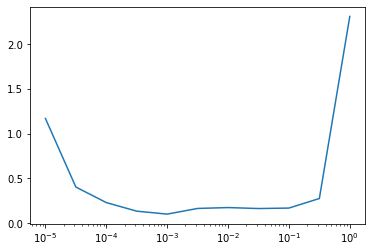

In [86]:
plt.semilogx(lr_data['lr'], lr_data['loss'] )

In [92]:
param_distribs = {
    'n_hidden': [4],
    'n_nodes': [100],
    'learning_rate': [1e-3, 1e-4]
}
best_params = {'n_hidden': None,
    'n_nodes': None,
    'learning_rate': None,
    'loss': [float('inf'), 0.0],
    'logs': None,
    'model': None}
lr_data = {'lr': [], 'loss': []}
count = 0
for hidden in param_distribs['n_hidden']:
    for nodes in param_distribs['n_nodes']:
        for lr in param_distribs['learning_rate']:
            
            print('\n\n\n\n Model: {}/{} (lr:{})'.format(count,len(param_distribs['learning_rate']),lr))
            count +=1
            run_logdir = get_run_logdir()
            run_model_save_file = get_model_save_name()
            callbacks = [EarlyStopping(patience=10,restore_best_weights=True),
                        TensorBoard(run_logdir),
                        ModelCheckpoint(run_model_save_file, save_best_only=True)]
            model = mnist_model(n_hidden=hidden, 
                                learning_rate=lr, 
                                n_nodes=nodes)
            model.fit(x_train, y_train, epochs=2000,
                      validation_data=(x_valid, y_valid),
                      callbacks=callbacks)
            loss = model.evaluate(x_valid, y_valid)
            lr_data['lr'].append(lr)
            lr_data['loss'].append(loss[0])
            if loss[0] < best_params['loss'][0]:
                best_params = {'n_hidden': hidden,
                                'n_nodes': nodes,
                                'learning_rate': lr,
                                'loss': loss,
                                'logs': run_logdir,
                                'model': run_model_save_file}
            print(best_params)





 Model: 0/2 (lr:0.001)
Epoch 1/2000
1563/1563 [==============================] - 3s 1ms/step - loss: 2.2766 - accuracy: 0.1571 - val_loss: 2.0980 - val_accuracy: 0.4051
Epoch 2/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9510 - accuracy: 0.4929 - val_loss: 1.2799 - val_accuracy: 0.7167
Epoch 3/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0879 - accuracy: 0.7436 - val_loss: 0.6838 - val_accuracy: 0.8218
Epoch 4/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.6324 - accuracy: 0.8339 - val_loss: 0.5028 - val_accuracy: 0.8616
Epoch 5/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4975 - accuracy: 0.8594 - val_loss: 0.4233 - val_accuracy: 0.8822
Epoch 6/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4254 - accuracy: 0.8789 - val_loss: 0.3787 - val_accuracy: 0.8945
Epoch 7/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3827 - accuracy: 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.1071 - accuracy: 0.9690 - val_loss: 0.1326 - val_accuracy: 0.9604
Epoch 57/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1050 - accuracy: 0.9701 - val_loss: 0.1340 - val_accuracy: 0.9607
Epoch 58/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1084 - accuracy: 0.9688 - val_loss: 0.1324 - val_accuracy: 0.9617
Epoch 59/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1011 - accuracy: 0.9711 - val_loss: 0.1291 - val_accuracy: 0.9619
Epoch 60/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0992 - accuracy: 0.9720 - val_loss: 0.1300 - val_accuracy: 0.9621
Epoch 61/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0989 - accuracy: 0.9716 - val_loss: 0.1281 - val_accuracy: 0.9627
Epoch 62/2000
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0964 - accuracy: 0.9725 - val_loss: 0.1288 - val_ac

Epoch 112/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0511 - accuracy: 0.9856 - val_loss: 0.1041 - val_accuracy: 0.9697
Epoch 113/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0516 - accuracy: 0.9865 - val_loss: 0.1030 - val_accuracy: 0.9707
Epoch 114/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0512 - accuracy: 0.9863 - val_loss: 0.1047 - val_accuracy: 0.9702
Epoch 115/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0491 - accuracy: 0.9871 - val_loss: 0.1027 - val_accuracy: 0.9713
Epoch 116/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0504 - accuracy: 0.9861 - val_loss: 0.1028 - val_accuracy: 0.9711
Epoch 117/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0510 - accuracy: 0.9854 - val_loss: 0.1028 - val_accuracy: 0.9707
Epoch 118/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0469 - accuracy: 0.9876 - val_

1563/1563 [==============================] - 2s 1ms/step - loss: 2.1959 - accuracy: 0.3580 - val_loss: 2.1725 - val_accuracy: 0.3946
Epoch 9/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1722 - accuracy: 0.3957 - val_loss: 2.1451 - val_accuracy: 0.4341
Epoch 10/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1434 - accuracy: 0.4361 - val_loss: 2.1130 - val_accuracy: 0.4740
Epoch 11/2000
1563/1563 [==============================] - 2s 992us/step - loss: 2.1104 - accuracy: 0.4770 - val_loss: 2.0752 - val_accuracy: 0.5193
Epoch 12/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0721 - accuracy: 0.5208 - val_loss: 2.0305 - val_accuracy: 0.5587
Epoch 13/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0279 - accuracy: 0.5476 - val_loss: 1.9774 - val_accuracy: 0.5892
Epoch 14/2000
1563/1563 [==============================] - 2s 970us/step - loss: 1.9723 - accuracy: 0.5805 - val_loss: 1.9148 - val

Epoch 64/2000
1563/1563 [==============================] - 2s 990us/step - loss: 0.4095 - accuracy: 0.8854 - val_loss: 0.4009 - val_accuracy: 0.8905
Epoch 65/2000
1563/1563 [==============================] - 1s 956us/step - loss: 0.4037 - accuracy: 0.8872 - val_loss: 0.3975 - val_accuracy: 0.8910
Epoch 66/2000
1563/1563 [==============================] - 2s 991us/step - loss: 0.3976 - accuracy: 0.8878 - val_loss: 0.3939 - val_accuracy: 0.8918
Epoch 67/2000
1563/1563 [==============================] - 2s 973us/step - loss: 0.3961 - accuracy: 0.8884 - val_loss: 0.3905 - val_accuracy: 0.8923
Epoch 68/2000
1563/1563 [==============================] - 1s 956us/step - loss: 0.3925 - accuracy: 0.8886 - val_loss: 0.3875 - val_accuracy: 0.8946
Epoch 69/2000
1563/1563 [==============================] - 2s 982us/step - loss: 0.3882 - accuracy: 0.8918 - val_loss: 0.3844 - val_accuracy: 0.8953
Epoch 70/2000
1563/1563 [==============================] - 2s 1000us/step - loss: 0.3926 - accuracy: 0.890

1563/1563 [==============================] - 2s 1ms/step - loss: 0.3000 - accuracy: 0.9134 - val_loss: 0.3022 - val_accuracy: 0.9164
Epoch 120/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2944 - accuracy: 0.9137 - val_loss: 0.3009 - val_accuracy: 0.9163
Epoch 121/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3018 - accuracy: 0.9134 - val_loss: 0.3004 - val_accuracy: 0.9171
Epoch 122/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2941 - accuracy: 0.9158 - val_loss: 0.2989 - val_accuracy: 0.9162
Epoch 123/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2962 - accuracy: 0.9142 - val_loss: 0.2977 - val_accuracy: 0.9161
Epoch 124/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2990 - accuracy: 0.9144 - val_loss: 0.2970 - val_accuracy: 0.9178
Epoch 125/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2963 - accuracy: 0.9144 - val_loss: 0.2959 - 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.2544 - accuracy: 0.9267 - val_loss: 0.2570 - val_accuracy: 0.9267
Epoch 175/2000
1563/1563 [==============================] - 2s 993us/step - loss: 0.2602 - accuracy: 0.9244 - val_loss: 0.2561 - val_accuracy: 0.9271
Epoch 176/2000
1563/1563 [==============================] - 2s 975us/step - loss: 0.2483 - accuracy: 0.9280 - val_loss: 0.2555 - val_accuracy: 0.9268
Epoch 177/2000
1563/1563 [==============================] - 2s 970us/step - loss: 0.2461 - accuracy: 0.9275 - val_loss: 0.2548 - val_accuracy: 0.9270
Epoch 178/2000
1563/1563 [==============================] - 1s 955us/step - loss: 0.2462 - accuracy: 0.9284 - val_loss: 0.2543 - val_accuracy: 0.9275
Epoch 179/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2470 - accuracy: 0.9267 - val_loss: 0.2535 - val_accuracy: 0.9266
Epoch 180/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2508 - accuracy: 0.9264 - val_loss: 0

1563/1563 [==============================] - 2s 1ms/step - loss: 0.2217 - accuracy: 0.9357 - val_loss: 0.2247 - val_accuracy: 0.9349
Epoch 230/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2114 - accuracy: 0.9395 - val_loss: 0.2244 - val_accuracy: 0.9349
Epoch 231/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2232 - accuracy: 0.9352 - val_loss: 0.2233 - val_accuracy: 0.9355
Epoch 232/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2190 - accuracy: 0.9357 - val_loss: 0.2228 - val_accuracy: 0.9357
Epoch 233/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2176 - accuracy: 0.9369 - val_loss: 0.2224 - val_accuracy: 0.9344
Epoch 234/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2174 - accuracy: 0.9378 - val_loss: 0.2218 - val_accuracy: 0.9359
Epoch 235/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2122 - accuracy: 0.9386 - val_loss: 0.2212 - 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.1942 - accuracy: 0.9442 - val_loss: 0.1993 - val_accuracy: 0.9416
Epoch 285/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1860 - accuracy: 0.9457 - val_loss: 0.1990 - val_accuracy: 0.9416
Epoch 286/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1871 - accuracy: 0.9454 - val_loss: 0.1987 - val_accuracy: 0.9423
Epoch 287/2000
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1899 - accuracy: 0.9447 - val_loss: 0.1980 - val_accuracy: 0.9421
Epoch 288/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1868 - accuracy: 0.9447 - val_loss: 0.1980 - val_accuracy: 0.9420
Epoch 289/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1883 - accuracy: 0.9458 - val_loss: 0.1974 - val_accuracy: 0.9425
Epoch 290/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1861 - accuracy: 0.9469 - val_loss: 0.1972 - 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.1693 - accuracy: 0.9507 - val_loss: 0.1802 - val_accuracy: 0.9467
Epoch 340/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1673 - accuracy: 0.9523 - val_loss: 0.1800 - val_accuracy: 0.9472
Epoch 341/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1642 - accuracy: 0.9517 - val_loss: 0.1795 - val_accuracy: 0.9469
Epoch 342/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1635 - accuracy: 0.9519 - val_loss: 0.1795 - val_accuracy: 0.9472
Epoch 343/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1666 - accuracy: 0.9526 - val_loss: 0.1790 - val_accuracy: 0.9477
Epoch 344/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1657 - accuracy: 0.9530 - val_loss: 0.1785 - val_accuracy: 0.9476
Epoch 345/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1644 - accuracy: 0.9526 - val_loss: 0.1785 - 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.1485 - accuracy: 0.9573 - val_loss: 0.1653 - val_accuracy: 0.9519
Epoch 395/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1463 - accuracy: 0.9581 - val_loss: 0.1651 - val_accuracy: 0.9513
Epoch 396/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1505 - accuracy: 0.9566 - val_loss: 0.1649 - val_accuracy: 0.9515
Epoch 397/2000
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1474 - accuracy: 0.9567 - val_loss: 0.1648 - val_accuracy: 0.9522
Epoch 398/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1442 - accuracy: 0.9580 - val_loss: 0.1648 - val_accuracy: 0.9521
Epoch 399/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1484 - accuracy: 0.9567 - val_loss: 0.1640 - val_accuracy: 0.9519
Epoch 400/2000
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1465 - accuracy: 0.9588 - val_loss: 0.1642 - 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.1380 - accuracy: 0.9609 - val_loss: 0.1539 - val_accuracy: 0.9554
Epoch 450/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1365 - accuracy: 0.9597 - val_loss: 0.1537 - val_accuracy: 0.9555
Epoch 451/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1302 - accuracy: 0.9622 - val_loss: 0.1536 - val_accuracy: 0.9557
Epoch 452/2000
1563/1563 [==============================] - 1s 958us/step - loss: 0.1381 - accuracy: 0.9603 - val_loss: 0.1531 - val_accuracy: 0.9553
Epoch 453/2000
1563/1563 [==============================] - 2s 975us/step - loss: 0.1339 - accuracy: 0.9606 - val_loss: 0.1536 - val_accuracy: 0.9548
Epoch 454/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1354 - accuracy: 0.9601 - val_loss: 0.1528 - val_accuracy: 0.9555
Epoch 455/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1327 - accuracy: 0.9612 - val_loss: 0.152

1563/1563 [==============================] - 2s 1ms/step - loss: 0.1227 - accuracy: 0.9637 - val_loss: 0.1447 - val_accuracy: 0.9571
Epoch 505/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1229 - accuracy: 0.9634 - val_loss: 0.1448 - val_accuracy: 0.9575
Epoch 506/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1202 - accuracy: 0.9643 - val_loss: 0.1447 - val_accuracy: 0.9571
Epoch 507/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1248 - accuracy: 0.9632 - val_loss: 0.1441 - val_accuracy: 0.9575
Epoch 508/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1239 - accuracy: 0.9637 - val_loss: 0.1442 - val_accuracy: 0.9576
Epoch 509/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1161 - accuracy: 0.9667 - val_loss: 0.1442 - val_accuracy: 0.9579
Epoch 510/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1196 - accuracy: 0.9652 - val_loss: 0.1440 - 

1563/1563 [==============================] - 3s 2ms/step - loss: 0.1142 - accuracy: 0.9663 - val_loss: 0.1373 - val_accuracy: 0.9595
Epoch 560/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1074 - accuracy: 0.9681 - val_loss: 0.1373 - val_accuracy: 0.9596
Epoch 561/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1135 - accuracy: 0.9662 - val_loss: 0.1370 - val_accuracy: 0.9594
Epoch 562/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1048 - accuracy: 0.9695 - val_loss: 0.1368 - val_accuracy: 0.9597
Epoch 563/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1100 - accuracy: 0.9674 - val_loss: 0.1368 - val_accuracy: 0.9594
Epoch 564/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1120 - accuracy: 0.9679 - val_loss: 0.1366 - val_accuracy: 0.9597
Epoch 565/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1117 - accuracy: 0.9679 - val_loss: 0.1368 - 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0998 - accuracy: 0.9713 - val_loss: 0.1313 - val_accuracy: 0.9605
Epoch 615/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0975 - accuracy: 0.9715 - val_loss: 0.1309 - val_accuracy: 0.9608
Epoch 616/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1018 - accuracy: 0.9709 - val_loss: 0.1306 - val_accuracy: 0.9611
Epoch 617/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0998 - accuracy: 0.9703 - val_loss: 0.1304 - val_accuracy: 0.9612
Epoch 618/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0987 - accuracy: 0.9718 - val_loss: 0.1307 - val_accuracy: 0.9608
Epoch 619/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0980 - accuracy: 0.9716 - val_loss: 0.1301 - val_accuracy: 0.9617
Epoch 620/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1048 - accuracy: 0.9686 - val_loss: 0.1303 - 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0967 - accuracy: 0.9722 - val_loss: 0.1257 - val_accuracy: 0.9630
Epoch 670/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0908 - accuracy: 0.9734 - val_loss: 0.1261 - val_accuracy: 0.9628
Epoch 671/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0964 - accuracy: 0.9730 - val_loss: 0.1259 - val_accuracy: 0.9630
Epoch 672/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0958 - accuracy: 0.9730 - val_loss: 0.1260 - val_accuracy: 0.9634
Epoch 673/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0950 - accuracy: 0.9728 - val_loss: 0.1257 - val_accuracy: 0.9629
Epoch 674/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0916 - accuracy: 0.9742 - val_loss: 0.1252 - val_accuracy: 0.9632
Epoch 675/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0940 - accuracy: 0.9737 - val_loss: 0.1252 - 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0843 - accuracy: 0.9755 - val_loss: 0.1211 - val_accuracy: 0.9647
Epoch 725/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0847 - accuracy: 0.9756 - val_loss: 0.1214 - val_accuracy: 0.9643
Epoch 726/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0814 - accuracy: 0.9771 - val_loss: 0.1211 - val_accuracy: 0.9650
Epoch 727/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0874 - accuracy: 0.9761 - val_loss: 0.1213 - val_accuracy: 0.9646
Epoch 728/2000
1563/1563 [==============================] - 2s 992us/step - loss: 0.0876 - accuracy: 0.9753 - val_loss: 0.1213 - val_accuracy: 0.9648
Epoch 729/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0846 - accuracy: 0.9754 - val_loss: 0.1208 - val_accuracy: 0.9652
Epoch 730/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0820 - accuracy: 0.9761 - val_loss: 0.1207 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0800 - accuracy: 0.9778 - val_loss: 0.1176 - val_accuracy: 0.9665
Epoch 780/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0809 - accuracy: 0.9774 - val_loss: 0.1171 - val_accuracy: 0.9667
Epoch 781/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0791 - accuracy: 0.9776 - val_loss: 0.1173 - val_accuracy: 0.9666
Epoch 782/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0773 - accuracy: 0.9784 - val_loss: 0.1170 - val_accuracy: 0.9666
Epoch 783/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0770 - accuracy: 0.9786 - val_loss: 0.1170 - val_accuracy: 0.9662
Epoch 784/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0793 - accuracy: 0.9770 - val_loss: 0.1171 - val_accuracy: 0.9664
Epoch 785/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0804 - accuracy: 0.9776 - val_loss: 0.1170 - 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0734 - accuracy: 0.9790 - val_loss: 0.1136 - val_accuracy: 0.9679
Epoch 835/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0770 - accuracy: 0.9789 - val_loss: 0.1141 - val_accuracy: 0.9674
Epoch 836/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0720 - accuracy: 0.9794 - val_loss: 0.1136 - val_accuracy: 0.9676
Epoch 837/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0733 - accuracy: 0.9792 - val_loss: 0.1140 - val_accuracy: 0.9675
Epoch 838/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0729 - accuracy: 0.9785 - val_loss: 0.1138 - val_accuracy: 0.9680
Epoch 839/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0731 - accuracy: 0.9791 - val_loss: 0.1136 - val_accuracy: 0.9677
Epoch 840/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0716 - accuracy: 0.9807 - val_loss: 0.1142 - 

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0677 - accuracy: 0.9810 - val_loss: 0.1114 - val_accuracy: 0.9684
Epoch 890/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0665 - accuracy: 0.9809 - val_loss: 0.1113 - val_accuracy: 0.9691
Epoch 891/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0646 - accuracy: 0.9812 - val_loss: 0.1110 - val_accuracy: 0.9691
Epoch 892/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0676 - accuracy: 0.9810 - val_loss: 0.1113 - val_accuracy: 0.9688
Epoch 893/2000
1563/1563 [==============================] - 2s 998us/step - loss: 0.0658 - accuracy: 0.9821 - val_loss: 0.1114 - val_accuracy: 0.9685
Epoch 894/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0667 - accuracy: 0.9818 - val_loss: 0.1108 - val_accuracy: 0.9692
Epoch 895/2000
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0665 - accuracy: 0.9810 - val_loss: 0.1109 